In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [26]:
beta2_values = np.linspace(0, 0.16, 9)

In [47]:
def power_simple(n, m):

    np.random.seed(42)

    esperances = []
    variances = []
    test_statistics = []
    msea = []
    mseb = []

    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a)**2
        msea.append(mean_squared_error(y_test, y_pred_a))

        # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        pb = (y_test - y_pred_b)**2
        mseb.append(mean_squared_error(y_test, y_pred_b))

        differences = pa - pb

        d_barre = sum(differences)/m
        var = np.var(differences, ddof=1)
        test_stat = (m**0.5)*d_barre/np.sqrt(var)
        
        test_statistics.append(test_stat)
        esperances.append(d_barre)
        variances.append(var) # Statistique pour l'hypothèse nulle

    return test_statistics, esperances, variances, msea, mseb


In [48]:
test_statistics_150, esperances_150, variances_150, msea_150, mseb_150 = power_simple(150,150)

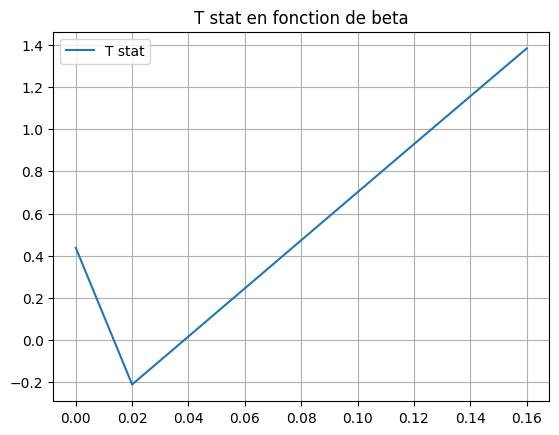

In [49]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, test_statistics_150, label = "T stat")
plt.grid()
plt.legend()
plt.show()

In [50]:
test_statistics_2000, esperances_2000, variances_2000, msea_2000, mseb_2000 = power_simple(150,2000)

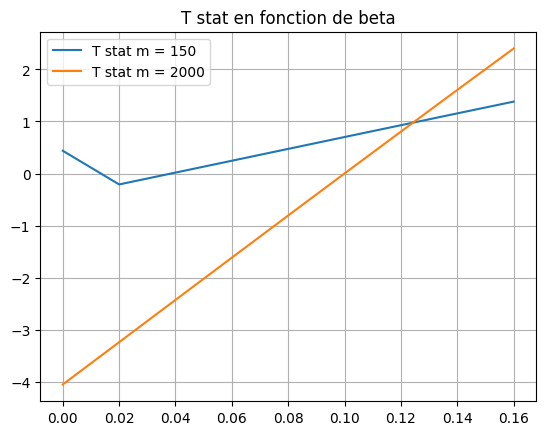

In [51]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, test_statistics_150, label = "T stat m = 150")
plt.plot(beta2_values, test_statistics_2000, label = "T stat m = 2000")
plt.grid()
plt.legend()
plt.show()

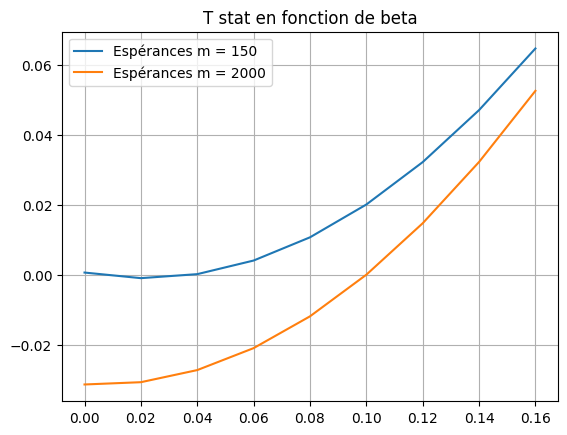

In [55]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, esperances_150, label = "Espérances m = 150")
plt.plot(beta2_values, esperances_2000, label = "Espérances m = 2000")
plt.grid()
plt.legend()
plt.show()

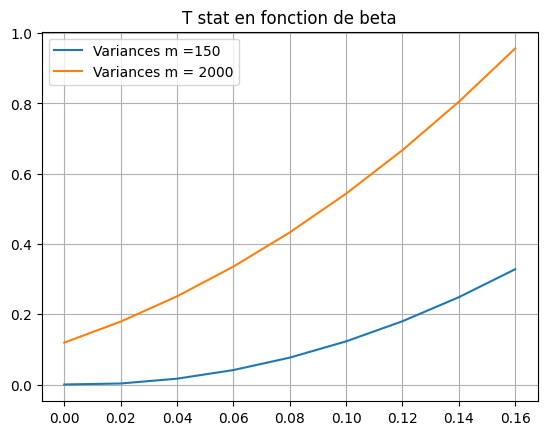

In [56]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, variances_150, label = "Variances m =150")
plt.plot(beta2_values, variances_2000, label = "Variances m = 2000")
plt.grid()
plt.legend()
plt.show()

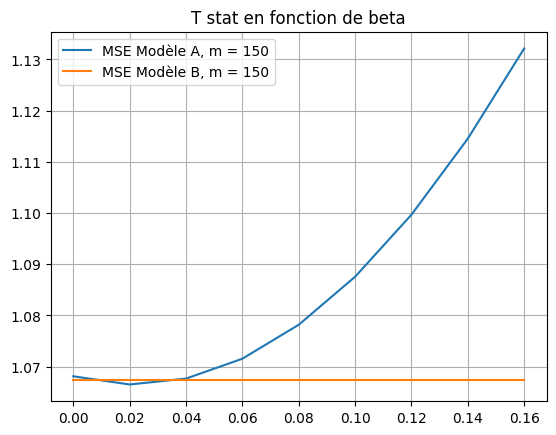

In [59]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, msea_150, label = "MSE Modèle A, m = 150")
plt.plot(beta2_values, mseb_150, label = "MSE Modèle B, m = 150")
plt.grid()
plt.legend()
plt.show()

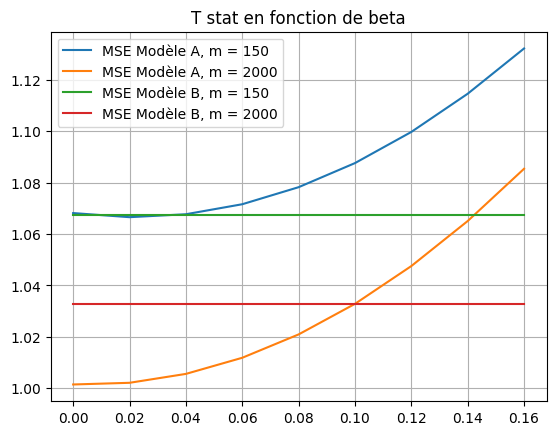

In [62]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, msea_150, label = "MSE Modèle A, m = 150")
plt.plot(beta2_values, msea_2000, label = "MSE Modèle A, m = 2000")
plt.plot(beta2_values, mseb_150, label = "MSE Modèle B, m = 150")
plt.plot(beta2_values, mseb_2000, label = "MSE Modèle B, m = 2000")
plt.grid()
plt.legend()
plt.show()

In [41]:
n = 150
m = n + 150

beta1 = 2
beta2 = 0.8
epsilon = np.random.normal(0, 1, n + m) 
x = np.random.uniform(0, 5, n + m)

x_train = x[:n]
x_test = x[n:n+m]

epsilon_train = epsilon[:n]
epsilon_test = epsilon[n:n+m]
    
            
y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred_a = model_a.predict(x_test.reshape(-1, 1))
pa = (y_test - y_pred_a)**2

        # Quadratic Model : B
x_train_quad = np.column_stack((x_train, x_train**2))
x_test_quad = np.column_stack((x_test, x_test**2))
            
model_b = LinearRegression().fit(x_train_quad, y_train)
y_pred_b = model_b.predict(x_test_quad)
pb = (y_test - y_pred_b)**2

differences = pa - pb

d_barre = sum(differences)/m
var = np.var(differences, ddof=1)
test_stat = (m**0.5)*d_barre/np.sqrt(var)


In [44]:
differences

array([-1.50382054e+00,  7.50965779e-02, -2.58404594e-01,  1.37198119e+00,
        7.77734748e+00,  7.19702791e-01, -1.88793696e+00,  3.51105494e+00,
        1.04331939e+01,  4.28360330e+00,  2.57291924e+00, -1.57690654e-01,
        1.69361163e-01,  8.62310849e-01,  4.89014173e+00,  6.43395176e-01,
        1.14154882e+00,  3.52645272e-01,  3.83554922e+00,  5.21498637e-01,
        1.29066399e+00,  2.52162126e+00,  2.02275956e+00,  7.88316532e-01,
       -2.02368713e+00,  1.60992277e+00,  4.22468447e+00,  1.76756874e+00,
        4.77207415e+00,  2.59752969e+00, -7.82130490e-01, -1.21094749e-01,
        7.98194446e-01, -7.31673913e-01, -6.23261235e-01, -6.67320184e+00,
        4.38433008e+00,  1.71783643e+00,  1.32775363e+01,  5.71755646e+00,
        2.30593459e+00, -4.47269188e-01,  4.71039373e-01, -5.27894441e-01,
        6.46726781e+00, -9.64074703e-02,  1.43117064e+01,  6.92459702e-01,
       -5.42828120e-02, -5.85972955e+00,  3.18465878e-01,  2.79432943e-01,
       -1.32973898e-01,  

In [80]:
def comparaison_stats():
    M = [100, 150, 200, 500, 1000, 2000, 4000]
    np.random.seed(42)
    test_statistics2 = []

    for m in M:

       test_statistics, esperances_2000, variances_2000, msea_2000, mseb_2000 = power_simple(150,m)
       test_statistics2.append(test_statistics)

    df = pd.DataFrame(test_statistics2)
    df = df.transpose()
    df.columns = ["m = 100", "m = 150", "m = 200", "m = 500", "m = 1000", "m = 2000", "m = 4000"]

    return df

In [82]:
df = comparaison_stats()

[]

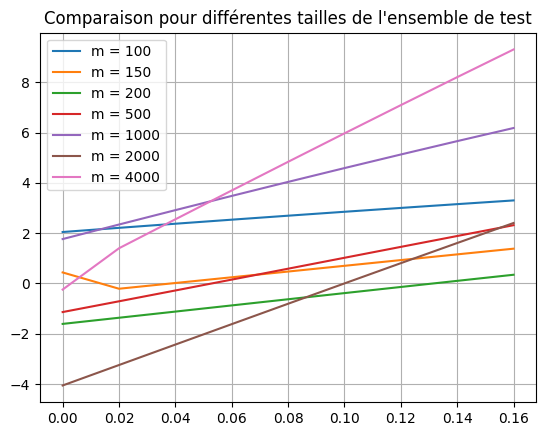

In [83]:
plt.figure()
plt.title("Comparaison pour différentes tailles de l'ensemble de test")
plt.plot(beta2_values, df["m = 100"], label = "m = 100")
plt.plot(beta2_values, df["m = 150"], label = "m = 150")
plt.plot(beta2_values, df["m = 200"], label = "m = 200")
plt.plot(beta2_values, df["m = 500"], label = "m = 500")
plt.plot(beta2_values, df["m = 1000"], label = "m = 1000")
plt.plot(beta2_values, df["m = 2000"], label = "m = 2000")
plt.plot(beta2_values, df["m = 4000"], label = "m = 4000")
plt.grid()
plt.legend()
plt.plot()